# Training for the Report

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
plt.style.use('ggplot')

from architectures import *
from functions import *

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 810246167651693778
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7445515469
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5167494484113750468
physical_device_desc: "device: 0, name: Tesla M60, pci bus id: 0000:00:1e.0, compute capability: 5.2"
]


In [3]:
def shuffle_data2(X_im, X_fl, Y, proportion = 0.6):
    # Generate a random selection of indexes
    indexes = random.sample(range(0, X_im.shape[0]), int(X_im.shape[0]*proportion))
    # Select desired examples for training (images)
    train_im = X_im[indexes]
    train_fl = X_fl[indexes]
    train_Y = Y[indexes].astype('float32')
    
    # Get indexes of non-chosen elements for data augmentation
    test_indexes = []
    for x in tqdm(range(0,X_im.shape[0])):
        if x not in indexes:
            test_indexes.append(x)
            
    # Select desired examples for training
    test_im = X_im[test_indexes]
    test_fl = X_fl[test_indexes]
    test_Y = Y[test_indexes].astype('float32')
        
    return train_im, train_fl, train_Y, test_im, test_fl, test_Y
    

In [7]:
#np.save('shuffle_dataset/train_im.npy', train_im)
#np.save('shuffle_dataset/train_fl.npy', train_fl)
#np.save('shuffle_dataset/train_Y.npy', train_Y)

#np.save('shuffle_dataset/train_im2.npy', train_im2)
#np.save('shuffle_dataset/train_fl2.npy', train_fl2)
#np.save('shuffle_dataset/train_Y2.npy', train_Y2)

## Load pre-shuffled data for training step 1

In [4]:
# Load step1 data
train_im = np.load('shuffle_dataset/train_im.npy')
train_fl = np.load('shuffle_dataset/train_fl.npy')
train_Y = np.load('shuffle_dataset/train_Y.npy')

# Split the 50% train dataset and generate a validation partition of 30% # Training proportion = 0.7
train_im, train_fl, train_Y, val_im, val_fl, val_Y = shuffle_data2(train_im, train_fl, train_Y, proportion = 0.7)

100%|██████████| 69085/69085 [00:51<00:00, 1341.31it/s]


### Generating partitions for training step2 - Better to do it at the end, after deleting training1

### So far we have:

    - Train/val step1 (50%):     training split 70%:  train_im, train_fl, train_Y
                                 validation split 30%: val_im, val_fl, val_Y

    - Train/val step2 (50%):     training split 70%:  train_im2, train_fl2, train_Y2
                                 validation split 30%: val_im2, val_fl2, val_Y2  
                                 
    - Test set (20% of the 50%): test_im, test_fl, test_Y

## Part 2: Training Spatial baseline

In [12]:
spatial = baseline(dropout=0.7)

In [13]:
spatial_final, history = train_convnet2D(spatial, train_im, train_Y, 
                                         val_im, val_Y, epochs=100,
                                         model_name='spatial_checkpoint_shuffle_final_DP.hdf5')

Train on 48359 samples, validate on 20726 samples
Epoch 1/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.1249 - val_loss: 0.0940

Epoch 00001: val_loss improved from inf to 0.09402, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 2/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0927 - val_loss: 0.0854

Epoch 00002: val_loss improved from 0.09402 to 0.08542, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 3/100
48359/48359 [==============================] - 84s 2ms/step - loss: 0.0851 - val_loss: 0.0800

Epoch 00003: val_loss improved from 0.08542 to 0.08001, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 4/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0794 - val_loss: 0.0764

Epoch 00004: val_loss improved from 0.08001 to 0.07636, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 5/100
48359/48359 [==============================] - 84s 2ms/step - 

48359/48359 [==============================] - 84s 2ms/step - loss: 0.0175 - val_loss: 0.0364

Epoch 00038: val_loss improved from 0.03651 to 0.03636, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 39/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0172 - val_loss: 0.0359

Epoch 00039: val_loss improved from 0.03636 to 0.03587, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 40/100
48359/48359 [==============================] - 84s 2ms/step - loss: 0.0167 - val_loss: 0.0358

Epoch 00040: val_loss improved from 0.03587 to 0.03583, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 41/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0164 - val_loss: 0.0357

Epoch 00041: val_loss improved from 0.03583 to 0.03567, saving model to spatial_checkpoint_shuffle_final_DP.hdf5
Epoch 42/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0156 - val_loss: 0.0363

Epoch 00042: val_loss

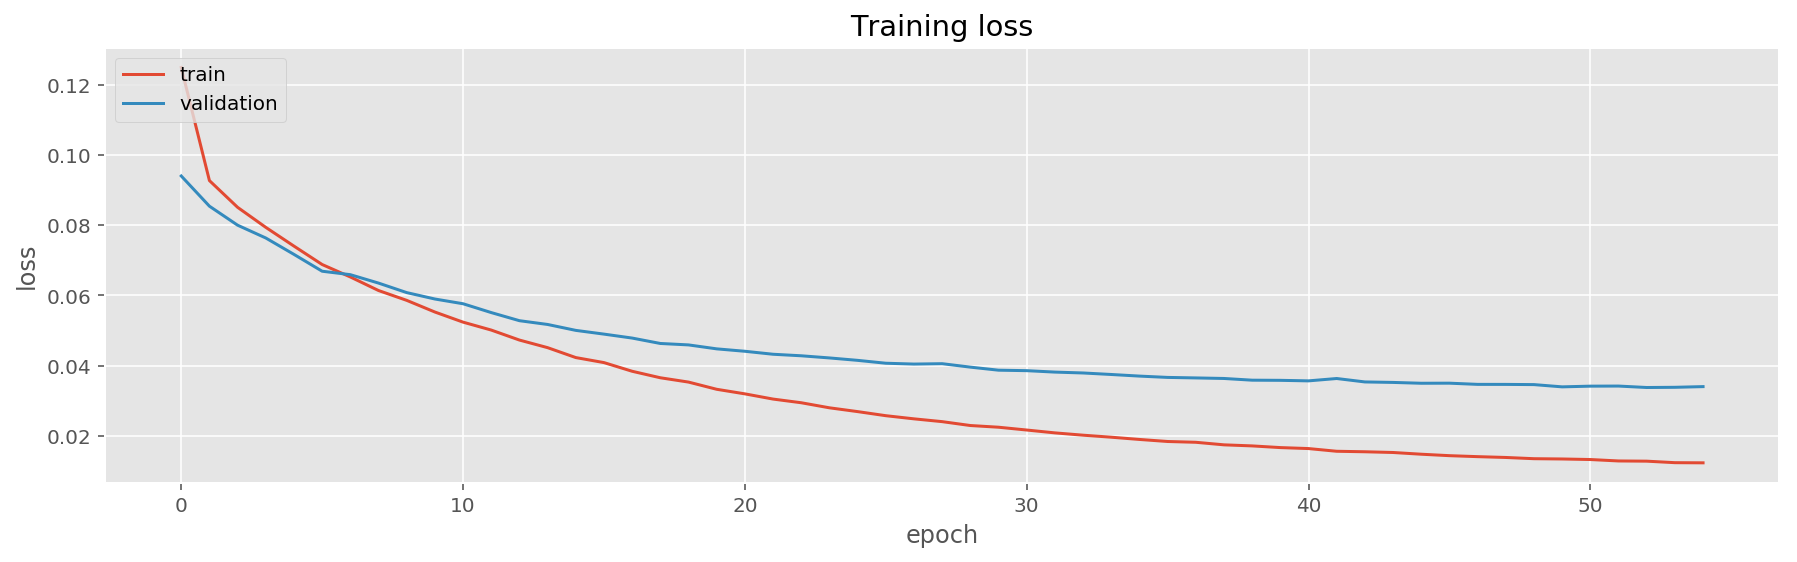

In [14]:
#0.7 Dropout
rcParams['figure.figsize'] = 15, 4
plot_train_loss(history)

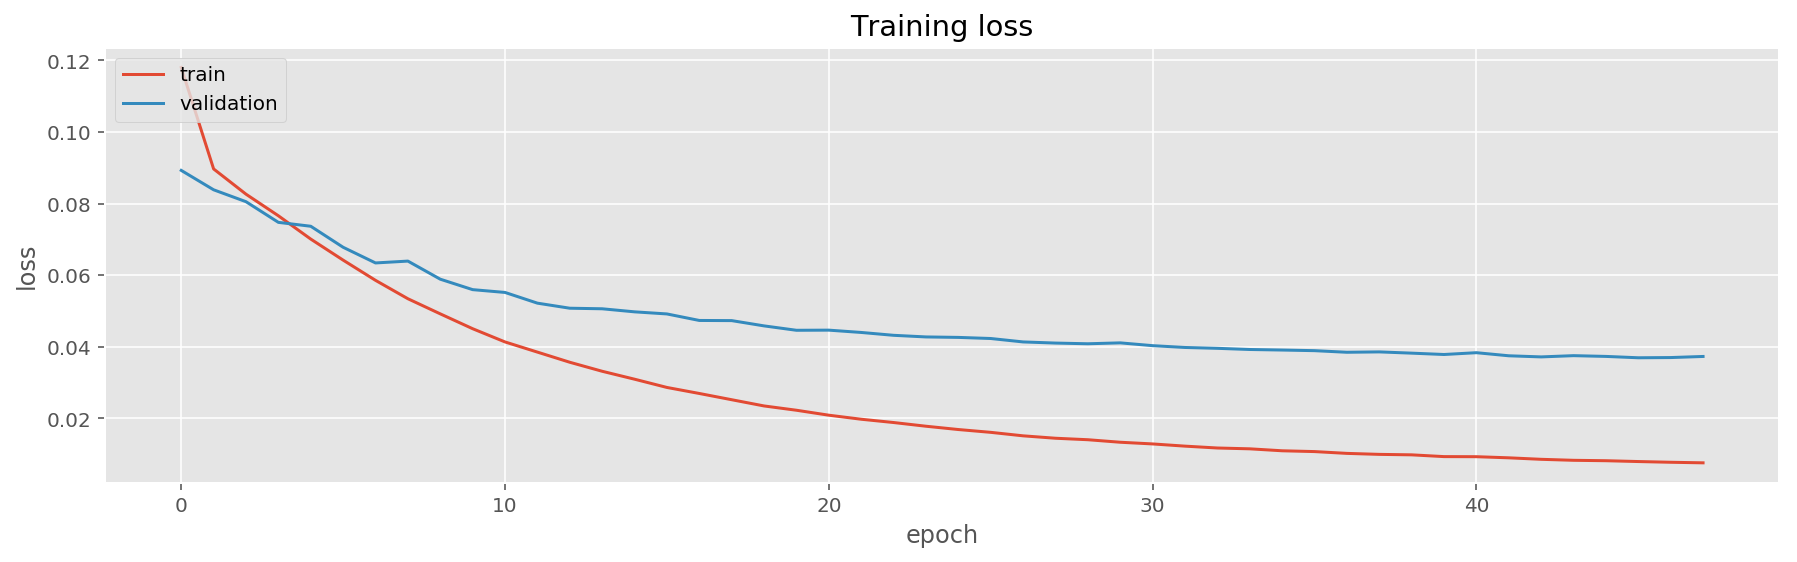

In [8]:
rcParams['figure.figsize'] = 15, 4
plot_train_loss(history)

In [9]:
temporal = baseline()

In [10]:
temporal_final, history1 = train_convnet2D(temporal, train_fl, train_Y, 
                                    val_fl, val_Y, epochs=100,
                                    model_name='temporal_checkpoint_shuffle_final.hdf5')

Train on 48359 samples, validate on 20726 samples
Epoch 1/100
48359/48359 [==============================] - 86s 2ms/step - loss: 0.1028 - val_loss: 0.0623

Epoch 00001: val_loss improved from inf to 0.06233, saving model to temporal_checkpoint_shuffle_final.hdf5
Epoch 2/100
48359/48359 [==============================] - 84s 2ms/step - loss: 0.0576 - val_loss: 0.0486

Epoch 00002: val_loss improved from 0.06233 to 0.04862, saving model to temporal_checkpoint_shuffle_final.hdf5
Epoch 3/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0501 - val_loss: 0.0503

Epoch 00003: val_loss did not improve from 0.04862
Epoch 4/100
48359/48359 [==============================] - 85s 2ms/step - loss: 0.0456 - val_loss: 0.0426

Epoch 00004: val_loss improved from 0.04862 to 0.04258, saving model to temporal_checkpoint_shuffle_final.hdf5
Epoch 5/100
48359/48359 [==============================] - 84s 2ms/step - loss: 0.0420 - val_loss: 0.0384

Epoch 00005: val_loss improved from

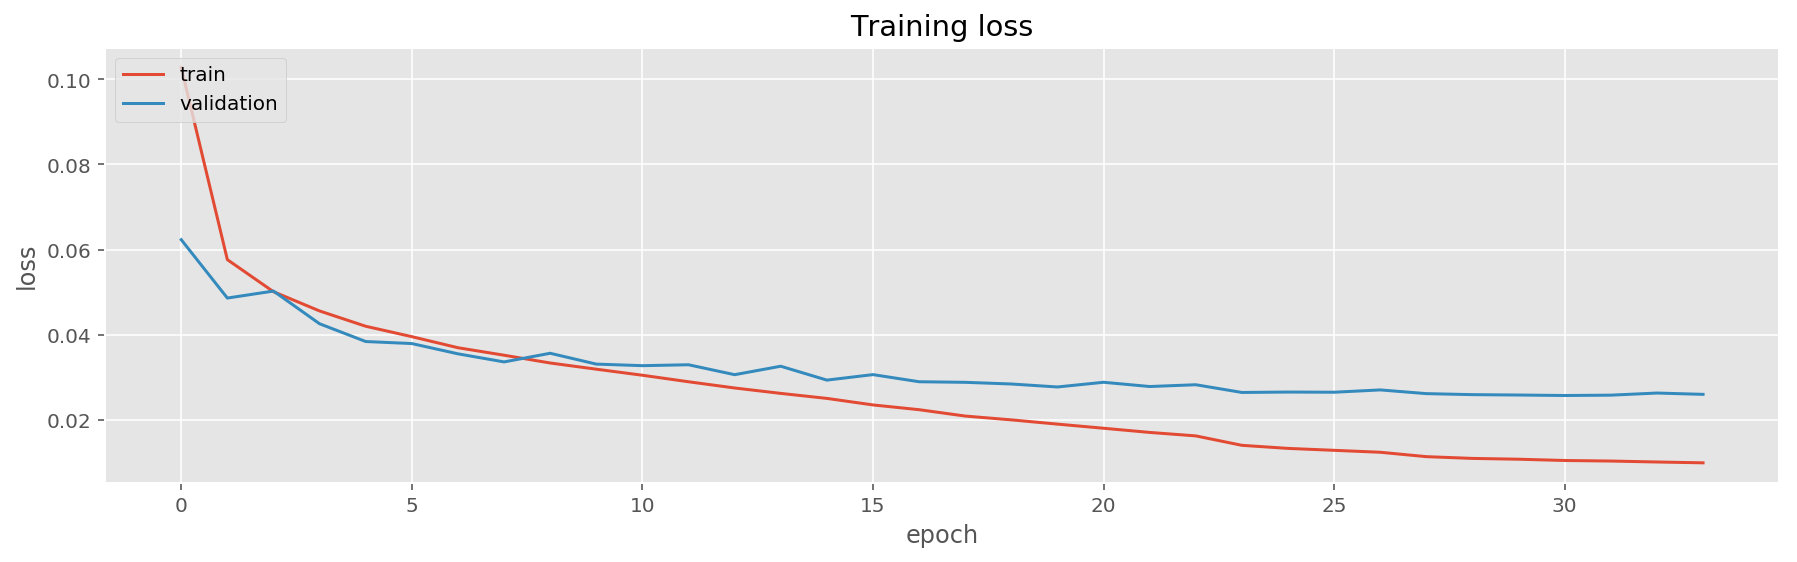

In [11]:
rcParams['figure.figsize'] = 15, 4
plot_train_loss(history1)

### Notes:
    - Images overfit more compared to flows

### Training step 2 - Finetuning models - Not particulary necessary when a good shuffle is done

In [16]:
# Delete variables of the initial training
del train_im, train_fl, train_Y, val_im, val_fl, val_Y 
# Load step2 data
train_im2 = np.load('shuffle_dataset/train_im2.npy')
train_fl2 = np.load('shuffle_dataset/train_fl2.npy')
train_Y2 = np.load('shuffle_dataset/train_Y2.npy')

# Generate a test set of 20% on the training2 partition
train_im2, train_fl2, train_Y2, test_im, test_fl, test_Y = shuffle_data2(train_im2, train_fl2, train_Y2, proportion = 0.8)

100%|██████████| 69086/69086 [00:54<00:00, 1270.79it/s]


### Test both model checkpoints with the test set

In [17]:
# Open models
spatial = load_model('spatial_checkpoint_shuffle.hdf5')
temporal = load_model('temporal_checkpoint_shuffle.hdf5')

In [18]:
spatial.evaluate(test_im, test_Y)

13818/13818 [==============================] - 7s 515us/step


0.04294307046565975

In [19]:
temporal.evaluate(test_fl, test_Y)

13818/13818 [==============================] - 7s 517us/step


0.029921642188260482

### Conclusions:
    - Temporal model outperformed the spatial model.
    - Apparently there is a bis overfit on the spatial model.

# Finetuning spatial and temporal models

In [22]:
# Generate validation partition on the rest of 30%
#train_im2, train_fl2, train_Y2, val_im2, val_fl2, val_Y2 = shuffle_data2(train_im2, train_fl2, train_Y2, proportion = 0.70)

100%|██████████| 55268/55268 [00:32<00:00, 1697.77it/s]


In [43]:
# Lowering learning rate and compiling + Train only for 10 epochs to avoid overfitting
# Already loaded Spatial 

adam = Adam(lr=0.5e-4)
spatial2.compile(optimizer=adam, loss='mse') 

In [44]:
spatial_fine, history4 = train_convnet2D(spatial, train_list[0], train_Y, 
                                         val_list[0], val_Y, epochs=100,
                                         model_name='spatial_checkpoint_shuffle_fine_last.hdf5')

Train on 38687 samples, validate on 16581 samples
Epoch 1/100
38687/38687 [==============================] - 69s 2ms/step - loss: 0.0399 - val_loss: 0.0340

Epoch 00001: val_loss improved from inf to 0.03397, saving model to spatial_checkpoint_shuffle_fine_last.hdf5
Epoch 2/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0313 - val_loss: 0.0317

Epoch 00002: val_loss improved from 0.03397 to 0.03168, saving model to spatial_checkpoint_shuffle_fine_last.hdf5
Epoch 3/100
38687/38687 [==============================] - 67s 2ms/step - loss: 0.0280 - val_loss: 0.0305

Epoch 00003: val_loss improved from 0.03168 to 0.03049, saving model to spatial_checkpoint_shuffle_fine_last.hdf5
Epoch 4/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0248 - val_loss: 0.0305

Epoch 00004: val_loss did not improve from 0.03049
Epoch 5/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0229 - val_loss: 0.0298

Epoch 00005: val_loss impr

In [45]:
# Lowering learning rate and compiling
adam = Adam(lr=0.5e-4)
temporal.compile(optimizer=adam, loss='mse') 

In [46]:
temporal_fine, history1 = train_convnet2D(temporal, train_list[1], train_Y, 
                                    val_list[1], val_Y, epochs=100,
                                    model_name='temporal_checkpoint_shuffle_fine_final.hdf5')

Train on 38687 samples, validate on 16581 samples
Epoch 1/100
38687/38687 [==============================] - 70s 2ms/step - loss: 0.0275 - val_loss: 0.0248

Epoch 00001: val_loss improved from inf to 0.02479, saving model to temporal_checkpoint_shuffle_fine_final.hdf5
Epoch 2/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0229 - val_loss: 0.0240

Epoch 00002: val_loss improved from 0.02479 to 0.02401, saving model to temporal_checkpoint_shuffle_fine_final.hdf5
Epoch 3/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0205 - val_loss: 0.0241

Epoch 00003: val_loss did not improve from 0.02401
Epoch 4/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0187 - val_loss: 0.0243

Epoch 00004: val_loss did not improve from 0.02401
Epoch 5/100
38687/38687 [==============================] - 68s 2ms/step - loss: 0.0171 - val_loss: 0.0240

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoc

### Checkpoint last finetuned models - You have to beat these results!

In [28]:
# Open models
spatial = load_model('spatial_checkpoint_shuffle_fine.hdf5')
temporal = load_model('temporal_checkpoint_shuffle_fine.hdf5')

In [29]:
spatial.evaluate(test_im, test_Y)

13818/13818 [==============================] - 7s 474us/step


0.03316046628561305

In [30]:
temporal.evaluate(test_fl, test_Y)

13818/13818 [==============================] - 11s 791us/step


0.025416624378739174

### Conclusions:
    - Both models improved by doing the finetuning. The spatial model gained more than the temporal.
    - Temporal model outperform the spatial model

## Two-streams model

In [33]:
train_list = [train_im2, train_fl2]  # train_Y2
val_list = [val_im2, val_fl2] # val_Y2
test_lists = [test_im, test_fl] #test_Y


#two_st, train_list, 
#                                                    train_Y2, val_list, val_Y2,
 #                                                   epochs= 10, model_name='2s
# Indexes
# train = 38687
# validation = 16581
#del train_im2, train_fl2, val_im2, val_fl2

NameError: name 'train_im2' is not defined

In [45]:
#np.save('shuffle_dataset/train_list.npy', train_list)
#np.save('shuffle_dataset/val_list.npy', val_list)
#np.save('shuffle_dataset/test_list.npy', test_lists)
#np.save('shuffle_dataset/train_Y_list.npy', train_Y2)
#np.save(''shuffle_dataset/val2_Y_list.npy'', val_Y2)
#np.save('shuffle_dataset/test_Y_list.npy', test_Y)


In [5]:
train_list = np.load('shuffle_dataset/train_list.npy')
val_list = np.load('shuffle_dataset/val_list.npy')
test_list = np.load('shuffle_dataset/test_list.npy')

train_Y = np.load('shuffle_dataset/train_Y_list.npy')
val_Y = np.load('shuffle_dataset/val_Y_list.npy')
test_Y = np.load('shuffle_dataset/test_Y_list.npy')


In [6]:
np.shape(val_list[0])

(16581, 160, 320, 3)

In [7]:
np.shape(val_Y)

(16581, 1)

In [43]:
# Saving second partitions
#np.save('shuffle_dataset/train_im2_tr2.npy', train_im2)
#np.save('shuffle_dataset/train_fl2_tr2.npy', train_fl2)
#np.save('shuffle_dataset/train_Y2_tr2.npy', train_Y2)

#np.save('shuffle_dataset/val_im2_tr2.npy', val_im2)
#np.save('shuffle_dataset/val_fl2_tr2.npy', val_fl2)
#np.save('shuffle_dataset/val_Y2_tr2.npy', val_Y2)

#np.save('shuffle_dataset/test_im_tr2.npy', test_im)
#np.save('shuffle_dataset/test_fl_tr2.npy', test_fl)
#np.save('shuffle_dataset/test_Y_tr2.npy', test_Y)


### Create a Two-streams Network

In [15]:
def two_streams1(spatial, temporal, method_add=True):
    
    if method_add == True:
        mergedOut = Add()([spatial.output, temporal.output])
    else:
        mergedOut = Concatenate()([spatial.output, temporal.output])
    
    mergedOut = Dropout(.5)(mergedOut)

    mergedOut = Dense(100, activation='relu')(mergedOut)

    mergedOut = Dense(50, activation='relu')(mergedOut)

    mergedOut = Dense(10, activation='relu')(mergedOut)

    mergedOut = Dense(1, activation='linear')(mergedOut)
    
    return Model([spatial.input, temporal.input], mergedOut)

In [22]:
#spatial2 = load_model('spatial_checkpoint_shuffle_final_DP.hdf5')
#temporal2 = load_model('temporal_checkpoint_shuffle_final.hdf5')

In [56]:
# pop last layers
spatial_pop = Model(spatial.inputs, spatial.layers[-5].output)
temporal_pop = Model(temporal.inputs, temporal.layers[-5].output)

In [57]:
two_st = two_streams1(spatial_pop, temporal_pop, method_add=True)

In [58]:
# Using a lower learning rate for finetuning!!! We spect the weights are close to the desired solution
#0.0001
adam = Adam(lr=0.5e-4)
two_st.compile(optimizer=adam, loss='mse') 

In [26]:
# After epoch 40
#adam = Adam(lr=2.5e-5)
#two_st.compile(optimizer=adam, loss='mse') 

In [29]:
np.shape(train_list[0])

(38687, 160, 320, 3)

In [59]:
final_2streams2, history_streams = train_two_streams(two_st, list(train_list), 
                                                    train_Y, list(val_list), val_Y,
                                                    epochs= 100, model_name='2streams_checkpoint_fine_II.hdf5' )

Train on 38687 samples, validate on 16581 samples
Epoch 1/100
38687/38687 [==============================] - 137s 4ms/step - loss: 0.0626 - val_loss: 0.0377

Epoch 00001: val_loss improved from inf to 0.03773, saving model to 2streams_checkpoint_fine_II.hdf5
Epoch 2/100
38687/38687 [==============================] - 134s 3ms/step - loss: 0.0424 - val_loss: 0.0352

Epoch 00002: val_loss improved from 0.03773 to 0.03524, saving model to 2streams_checkpoint_fine_II.hdf5
Epoch 3/100
38687/38687 [==============================] - 133s 3ms/step - loss: 0.0370 - val_loss: 0.0319

Epoch 00003: val_loss improved from 0.03524 to 0.03192, saving model to 2streams_checkpoint_fine_II.hdf5
Epoch 4/100
38687/38687 [==============================] - 134s 3ms/step - loss: 0.0343 - val_loss: 0.0314

Epoch 00004: val_loss improved from 0.03192 to 0.03144, saving model to 2streams_checkpoint_fine_II.hdf5
Epoch 5/100
38687/38687 [==============================] - 134s 3ms/step - loss: 0.0319 - val_loss: 0.

### Apparently a very low learning rate slow the convergency - 40 epochs minimum - after the 40 lower by 0.5 the learning rate

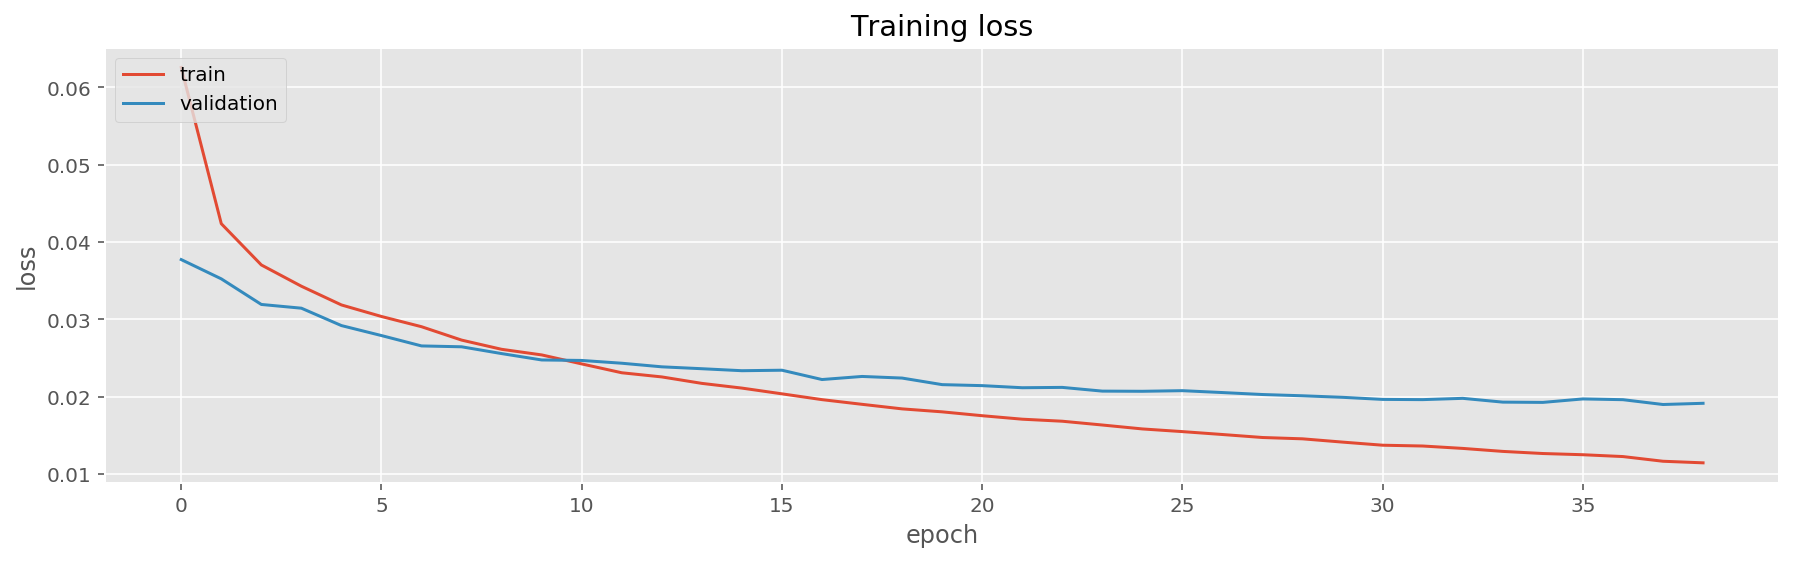

In [62]:
rcParams['figure.figsize'] = 15, 4
plot_train_loss(history_streams)

In [55]:
spatial = load_model('spatial_checkpoint_shuffle_fine_last.hdf5')
temporal = load_model('temporal_checkpoint_shuffle_fine_final.hdf5')


In [50]:
spatial.evaluate(test_list[0], test_Y)

13818/13818 [==============================] - 10s 695us/step


0.02663150853788129

In [51]:
temporal.evaluate(test_list[1], test_Y)

13818/13818 [==============================] - 9s 678us/step


0.02310654845960597

In [53]:
streams = load_model('2streams_checkpoint_final20.hdf5')

In [60]:
streams2 = load_model('2streams_checkpoint_fine_II.hdf5')

In [61]:
streams2.evaluate(list(test_list), test_Y)

13818/13818 [==============================] - 25s 2ms/step


0.018738708950181242

In [54]:
streams.evaluate(test_lists, test_Y)

13818/13818 [==============================] - 18s 1ms/step


0.018190024653415956

In [55]:
preds_two = streams.predict(test_lists)

## Ploting predictions

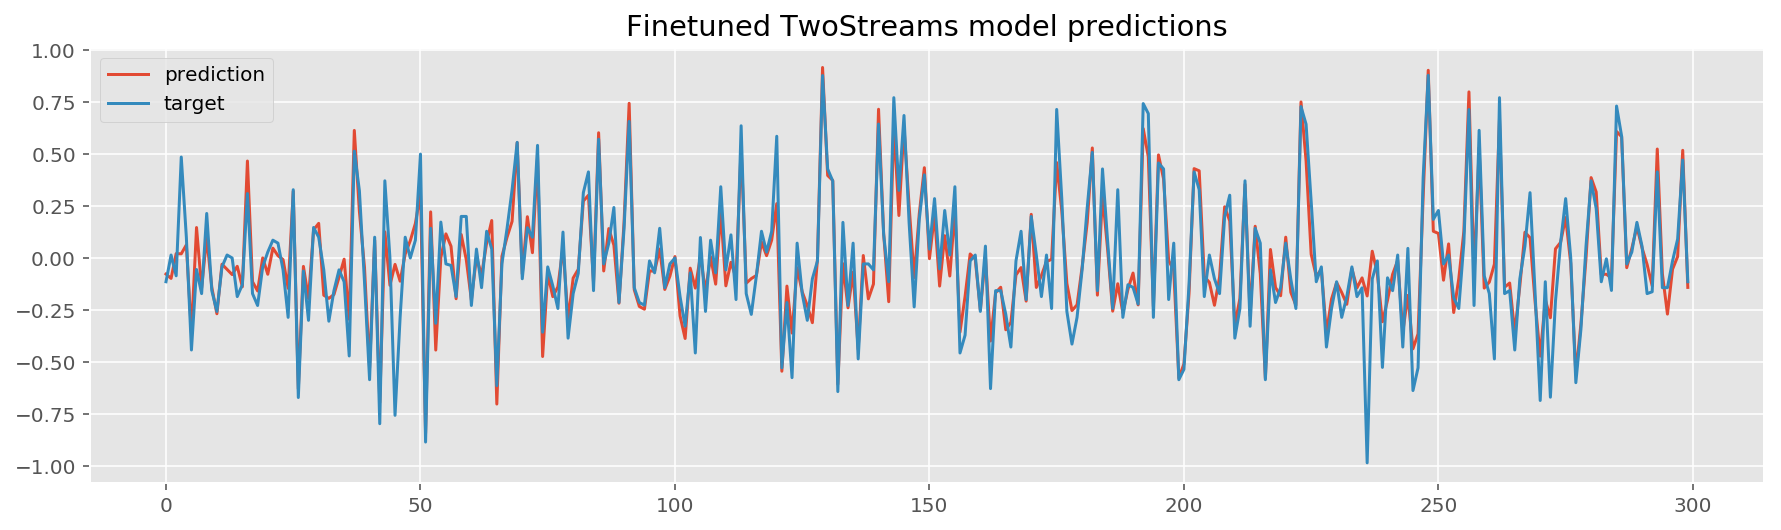

In [58]:
plt.plot(np.array(preds_two[200:500]).reshape(-1), label='prediction')
plt.plot(test_Y[200:500], label='target')
plt.title('Finetuned TwoStreams model predictions')
plt.legend()

In [61]:
np.shape(test_lists[0])

(13818, 160, 320, 3)

In [63]:
im = test_lists[0]

In [66]:
pred_sp = spatial.predict(np.array(im))

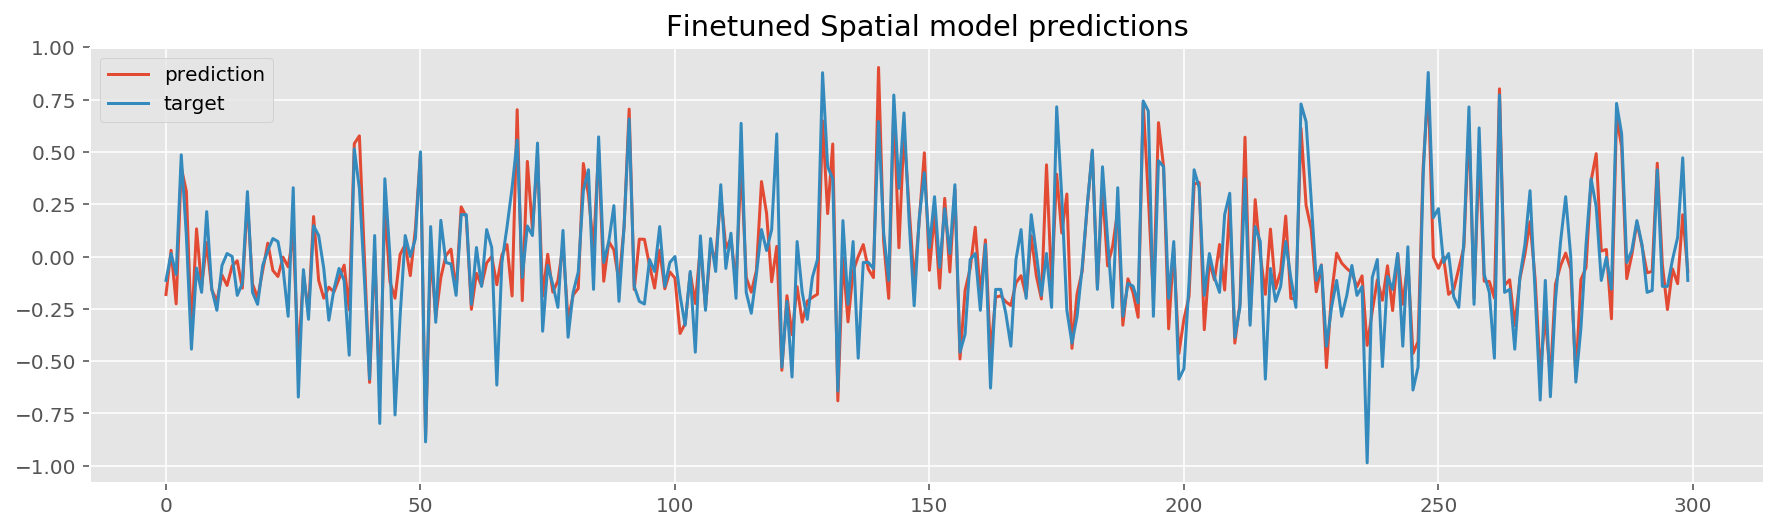

In [68]:
plt.plot(np.array(pred_sp[200:500]).reshape(-1), label='prediction')
plt.plot(test_Y[200:500], label='target')
plt.title('Finetuned Spatial model predictions')
plt.legend()

In [69]:
pred_tm = temporal.predict(np.array(test_lists[1]))

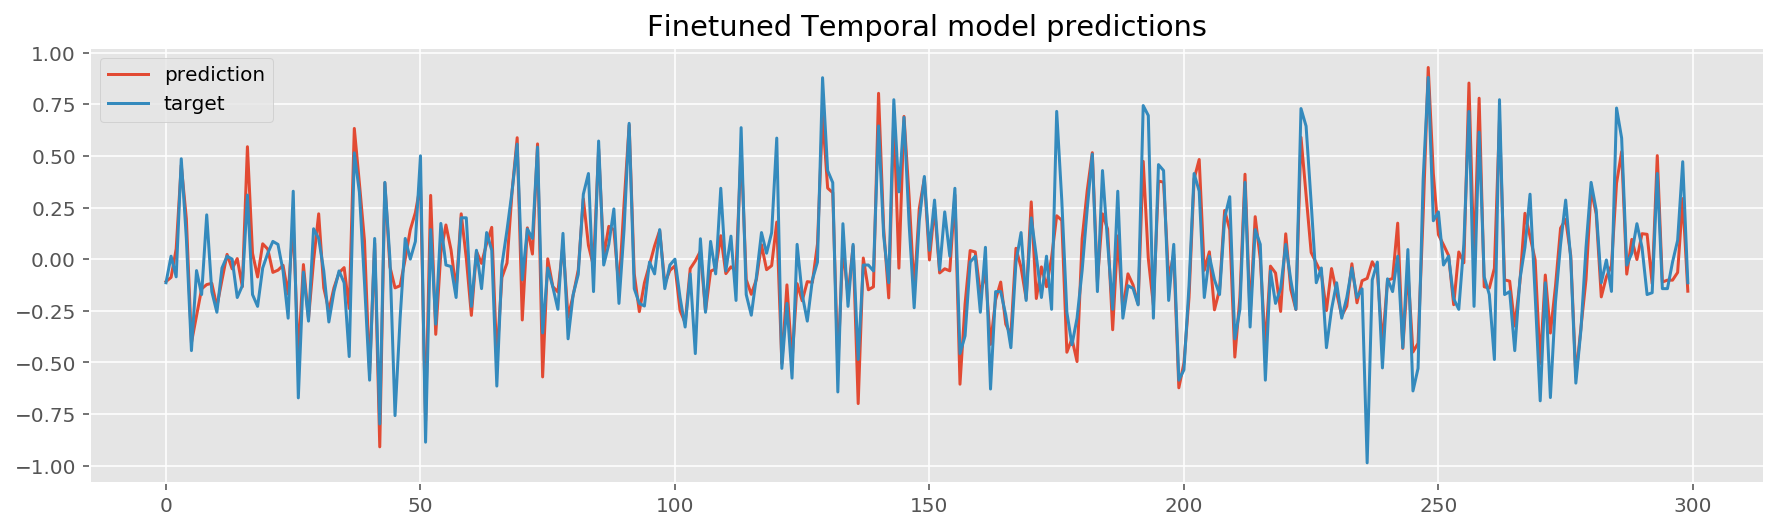

In [70]:
plt.plot(np.array(pred_tm[200:500]).reshape(-1), label='prediction')
plt.plot(test_Y[200:500], label='target')
plt.title('Finetuned Temporal model predictions')
plt.legend()

### Conclusions:
    As all validation and test accuracy are very similar, this means I can automatize the training for 100 epochs with snapshot and early stopping.
    The two-streams model outperforms all other models. 

In [ ]:
#streams = load_model('2streams_checkpoint_final20.hdf5')
#spatial2 = load_model('spatial_checkpoint_shuffle_fine.hdf5')
#temporal2 = load_model('temporal_checkpoint_shuffle_fine.hdf5')